In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_csv('/kaggle/input/wine-quality/winequality-red.csv')
data.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

In [3]:
X = data.columns.str.split(';')

In [4]:
X = X[0]

In [5]:
for i in range(1,len(X)):
  X[i] = X[i][1:-1]

In [6]:
data.columns = data.columns.str.replace('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"','column')

In [7]:
data.columns = data.columns.str.replace('column','col')

In [8]:
data.head()

col
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

In [9]:

for i in range(len(X)):
    data[X[i]] = [x[i] for x in data.col.str.split(';') ]
    print(data['col'].str.split(';')[i])

['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5']
['7.8', '0.88', '0', '2.6', '0.098', '25', '67', '0.9968', '3.2', '0.68', '9.8', '5']
['7.8', '0.76', '0.04', '2.3', '0.092', '15', '54', '0.997', '3.26', '0.65', '9.8', '5']
['11.2', '0.28', '0.56', '1.9', '0.075', '17', '60', '0.998', '3.16', '0.58', '9.8', '6']
['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5']
['7.4', '0.66', '0', '1.8', '0.075', '13', '40', '0.9978', '3.51', '0.56', '9.4', '5']
['7.9', '0.6', '0.06', '1.6', '0.069', '15', '59', '0.9964', '3.3', '0.46', '9.4', '5']
['7.3', '0.65', '0', '1.2', '0.065', '15', '21', '0.9946', '3.39', '0.47', '10', '7']
['7.8', '0.58', '0.02', '2', '0.073', '9', '18', '0.9968', '3.36', '0.57', '9.5', '7']
['7.5', '0.5', '0.36', '6.1', '0.071', '17', '102', '0.9978', '3.35', '0.8', '10.5', '5']
['6.7', '0.58', '0.08', '1.8', '0.097', '15', '65', '0.9959', '3.28', '0.54', '9.2', '5']
['7.5', '0.5', '0.36', '6.1', '0.07

In [10]:
data.drop(columns=['col'],inplace=True)

In [11]:
data.head()

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0           7.4              0.7           0            1.9     0.076   
1           7.8             0.88           0            2.6     0.098   
2           7.8             0.76        0.04            2.3     0.092   
3          11.2             0.28        0.56            1.9     0.075   
4           7.4              0.7           0            1.9     0.076   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                  11                   34  0.9978  3.51      0.56     9.4   
1                  25                   67  0.9968   3.2      0.68     9.8   
2                  15                   54   0.997  3.26      0.65     9.8   
3                  17                   60   0.998  3.16      0.58     9.8   
4                  11                   34  0.9978  3.51      0.56     9.4   

  quality  
0       5  
1       5  
2       5  
3       6  
4       5

In [12]:
data.describe()

fixed acidity volatile acidity citric acid residual sugar chlorides  \
count           1599             1599        1599           1599      1599   
unique            96              143          80             91       153   
top              7.2              0.6           0              2      0.08   
freq              67               47         132            156        66   

       free sulfur dioxide total sulfur dioxide density    pH sulphates  \
count                 1599                 1599    1599  1599      1599   
unique                  60                  144     436    89        96   
top                      6                   28  0.9972   3.3       0.6   
freq                   138                   43      36    57        69   

       alcohol quality  
count     1599    1599  
unique      65       6  
top        9.5       5  
freq       139     681

In [13]:
red_wine_data = data

In [14]:
red_wine_data.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [15]:
data = pd.read_csv('/kaggle/input/wine-quality/winequality-red.csv')
data.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

In [16]:
X = data.columns.str.split(';')

In [17]:
X = X[0]

In [18]:
for i in range(1,len(X)):
  X[i] = X[i][1:-1]

In [19]:
data.columns = data.columns.str.replace('fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"','col')

In [20]:
for i in range(len(X)):
  data[X[i]] = [x[i]  for x in data.col.str.split(';')]

In [21]:
data.drop(columns=['col'],inplace=True)

In [22]:
data.shape

(1599, 12)

In [23]:
data.head()

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0           7.4              0.7           0            1.9     0.076   
1           7.8             0.88           0            2.6     0.098   
2           7.8             0.76        0.04            2.3     0.092   
3          11.2             0.28        0.56            1.9     0.075   
4           7.4              0.7           0            1.9     0.076   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                  11                   34  0.9978  3.51      0.56     9.4   
1                  25                   67  0.9968   3.2      0.68     9.8   
2                  15                   54   0.997  3.26      0.65     9.8   
3                  17                   60   0.998  3.16      0.58     9.8   
4                  11                   34  0.9978  3.51      0.56     9.4   

  quality  
0       5  
1       5  
2       5  
3       6  
4       5

In [24]:
data.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [25]:
data['Type'] = 'White'

In [26]:
red_wine_data['Type'] = 'Red'

In [27]:
New_data = pd.concat([red_wine_data,data],axis=0)

In [28]:
New_data.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
Type                    object
dtype: object

In [29]:
New_data[New_data.columns[:-2]] = New_data[New_data.columns[:-2]].apply(pd.to_numeric)

In [30]:
New_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
Type                     object
dtype: object

In [31]:
New_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality Type  
0      9.4       5  Red  
1      9.8       5  Red  
2      9.8       5  Red  
3      9.8       6  Red  
4      9.4       5  Red

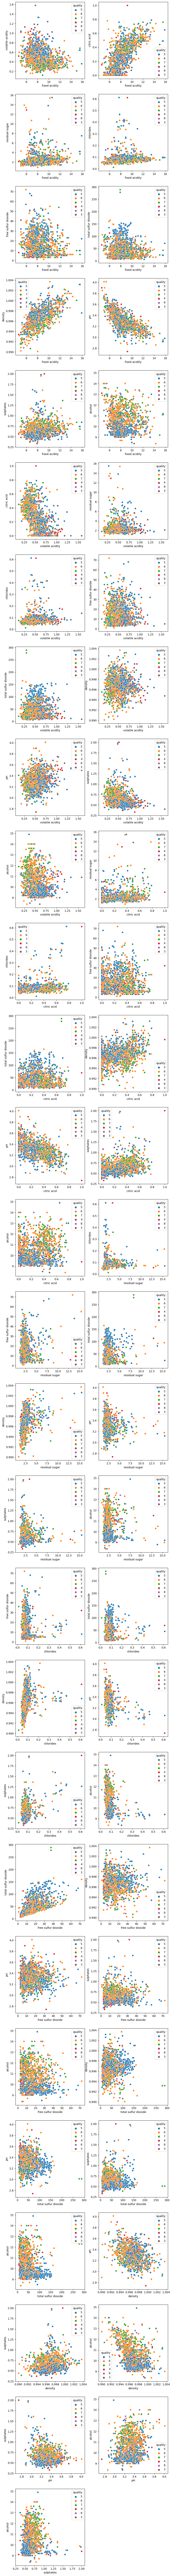

In [32]:
plt.figure(figsize=(10,200))
col = New_data.columns[:-2]
c=1
for i in range(len(col)):
    for j in range(i+1,len(col)):
        plt.subplot(33,2,c)
        sns.scatterplot(x=New_data[col[i]],y=New_data[col[j]],data=New_data,hue='quality')
        c+=1

In [33]:
New_data = New_data.drop_duplicates()
data = New_data

In [34]:
data.columns = data.columns.str.replace(' ','_')

In [35]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol quality Type  
0      9.4       5  Red  
1      9.8       5  Red  
2      9.8       5  Red  
3      9.8       6  Red  
5      9.4       5  Red

<Axes: xlabel='quality', ylabel='count'>

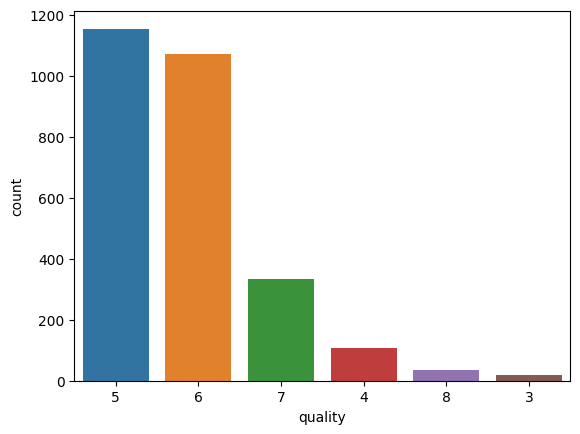

In [36]:
sns.countplot(x = data.quality)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

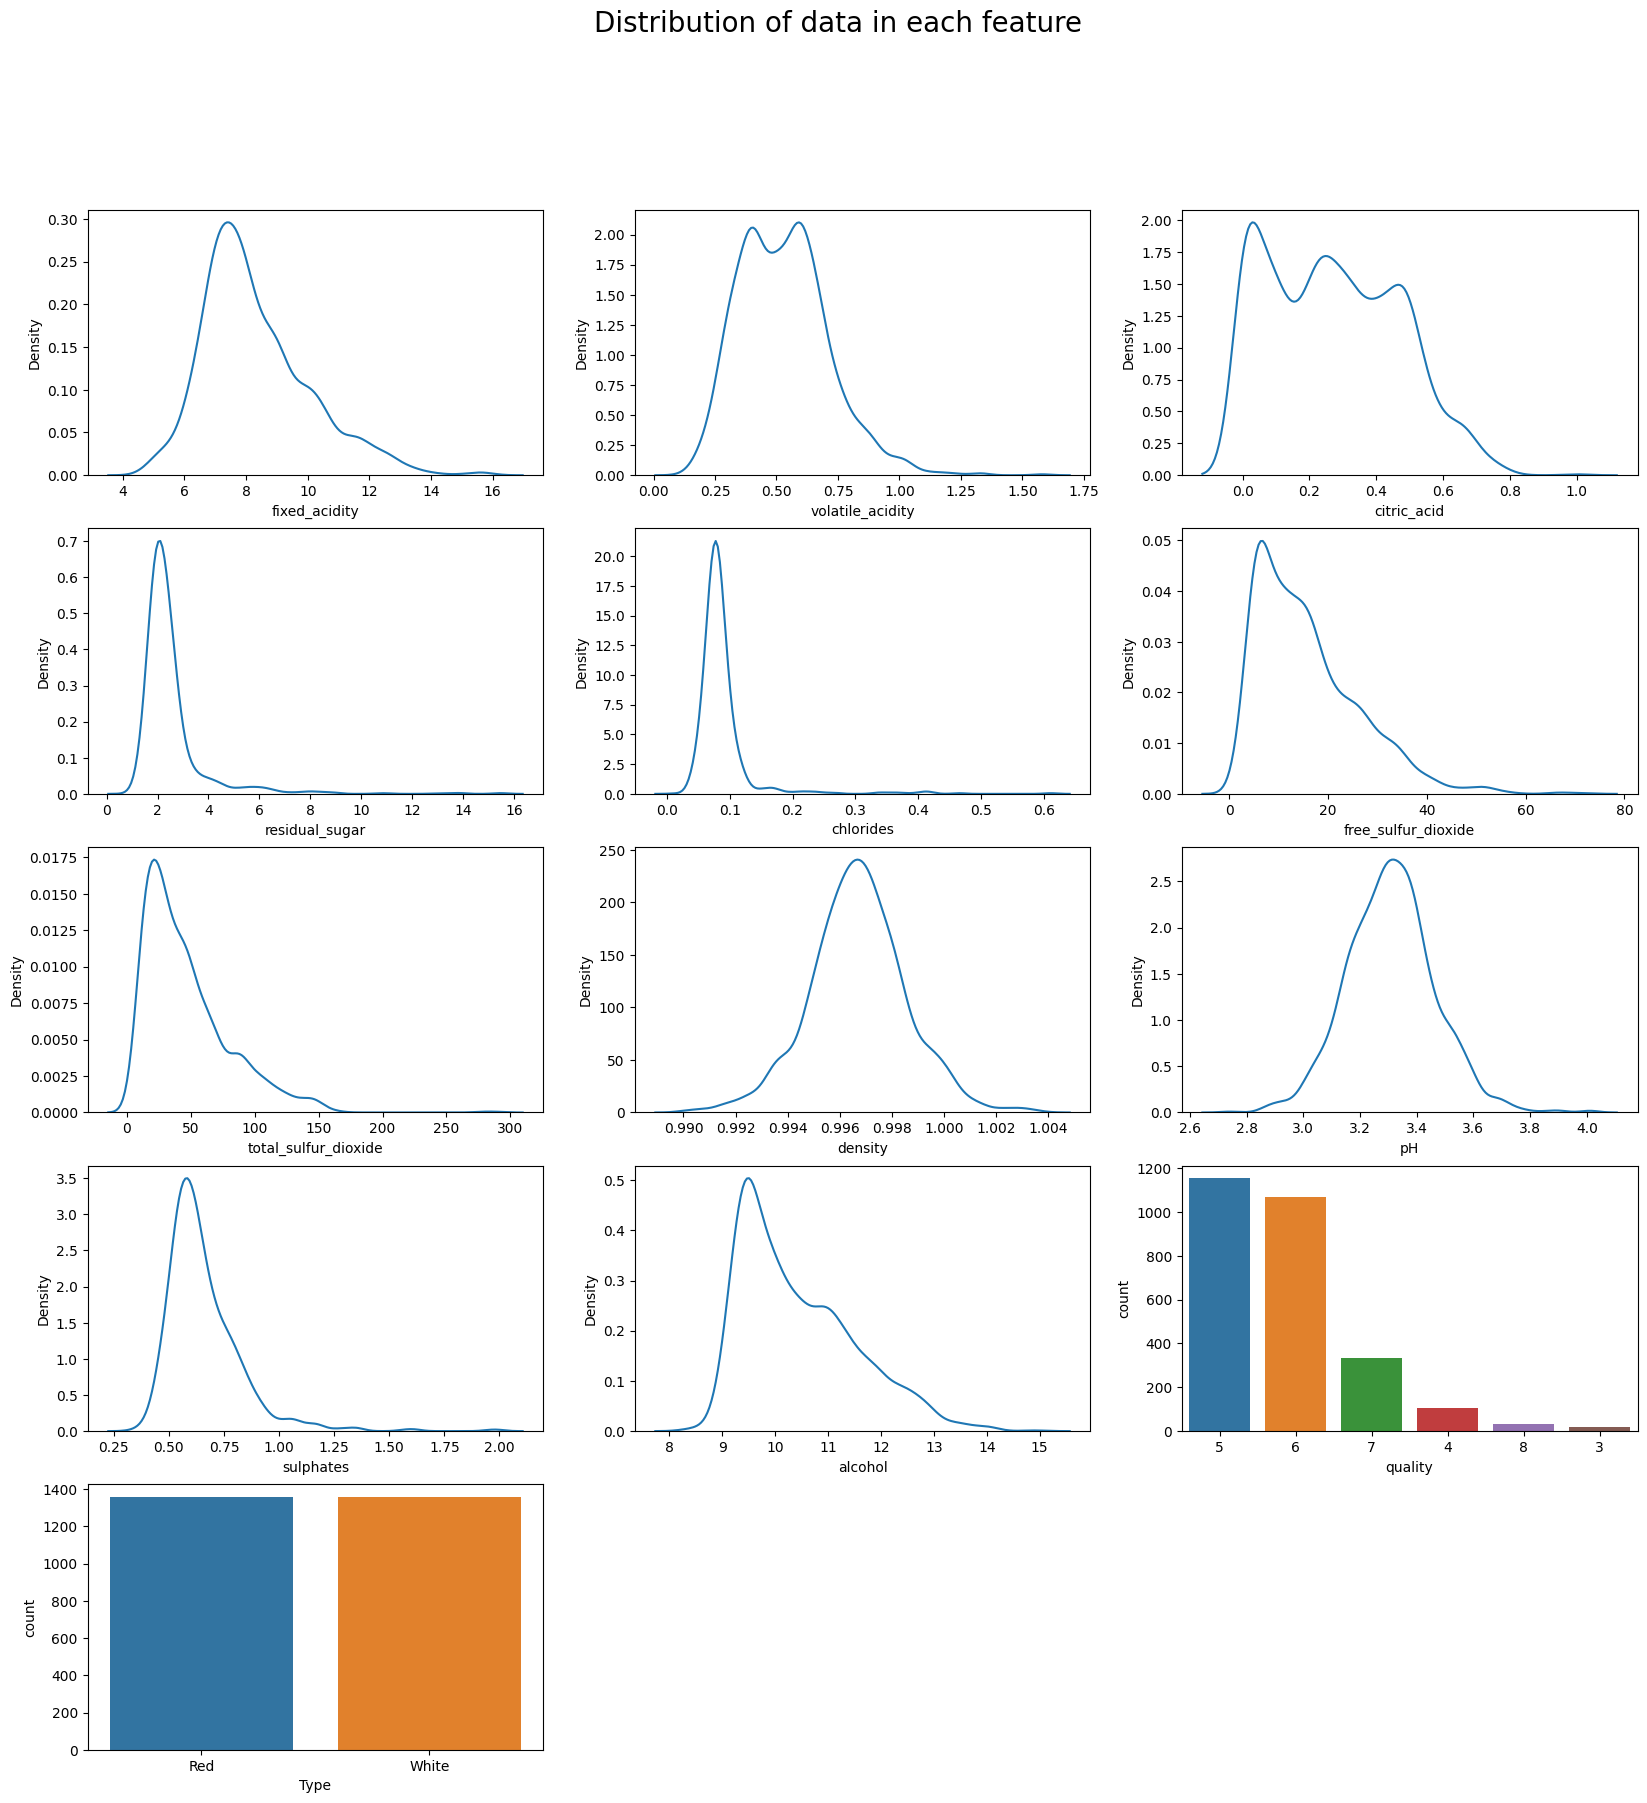

In [37]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribution of data in each feature',fontsize=20)
numeric_column =  data.select_dtypes('int','float').columns
obj = data.select_dtypes('object').columns
col = data.columns
for i in range(len(col)):
  if col[i] in obj:
    plt.subplot(5,3,i+1)
    sns.countplot(x = data[col[i]])

  else:
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = data[col[i]])

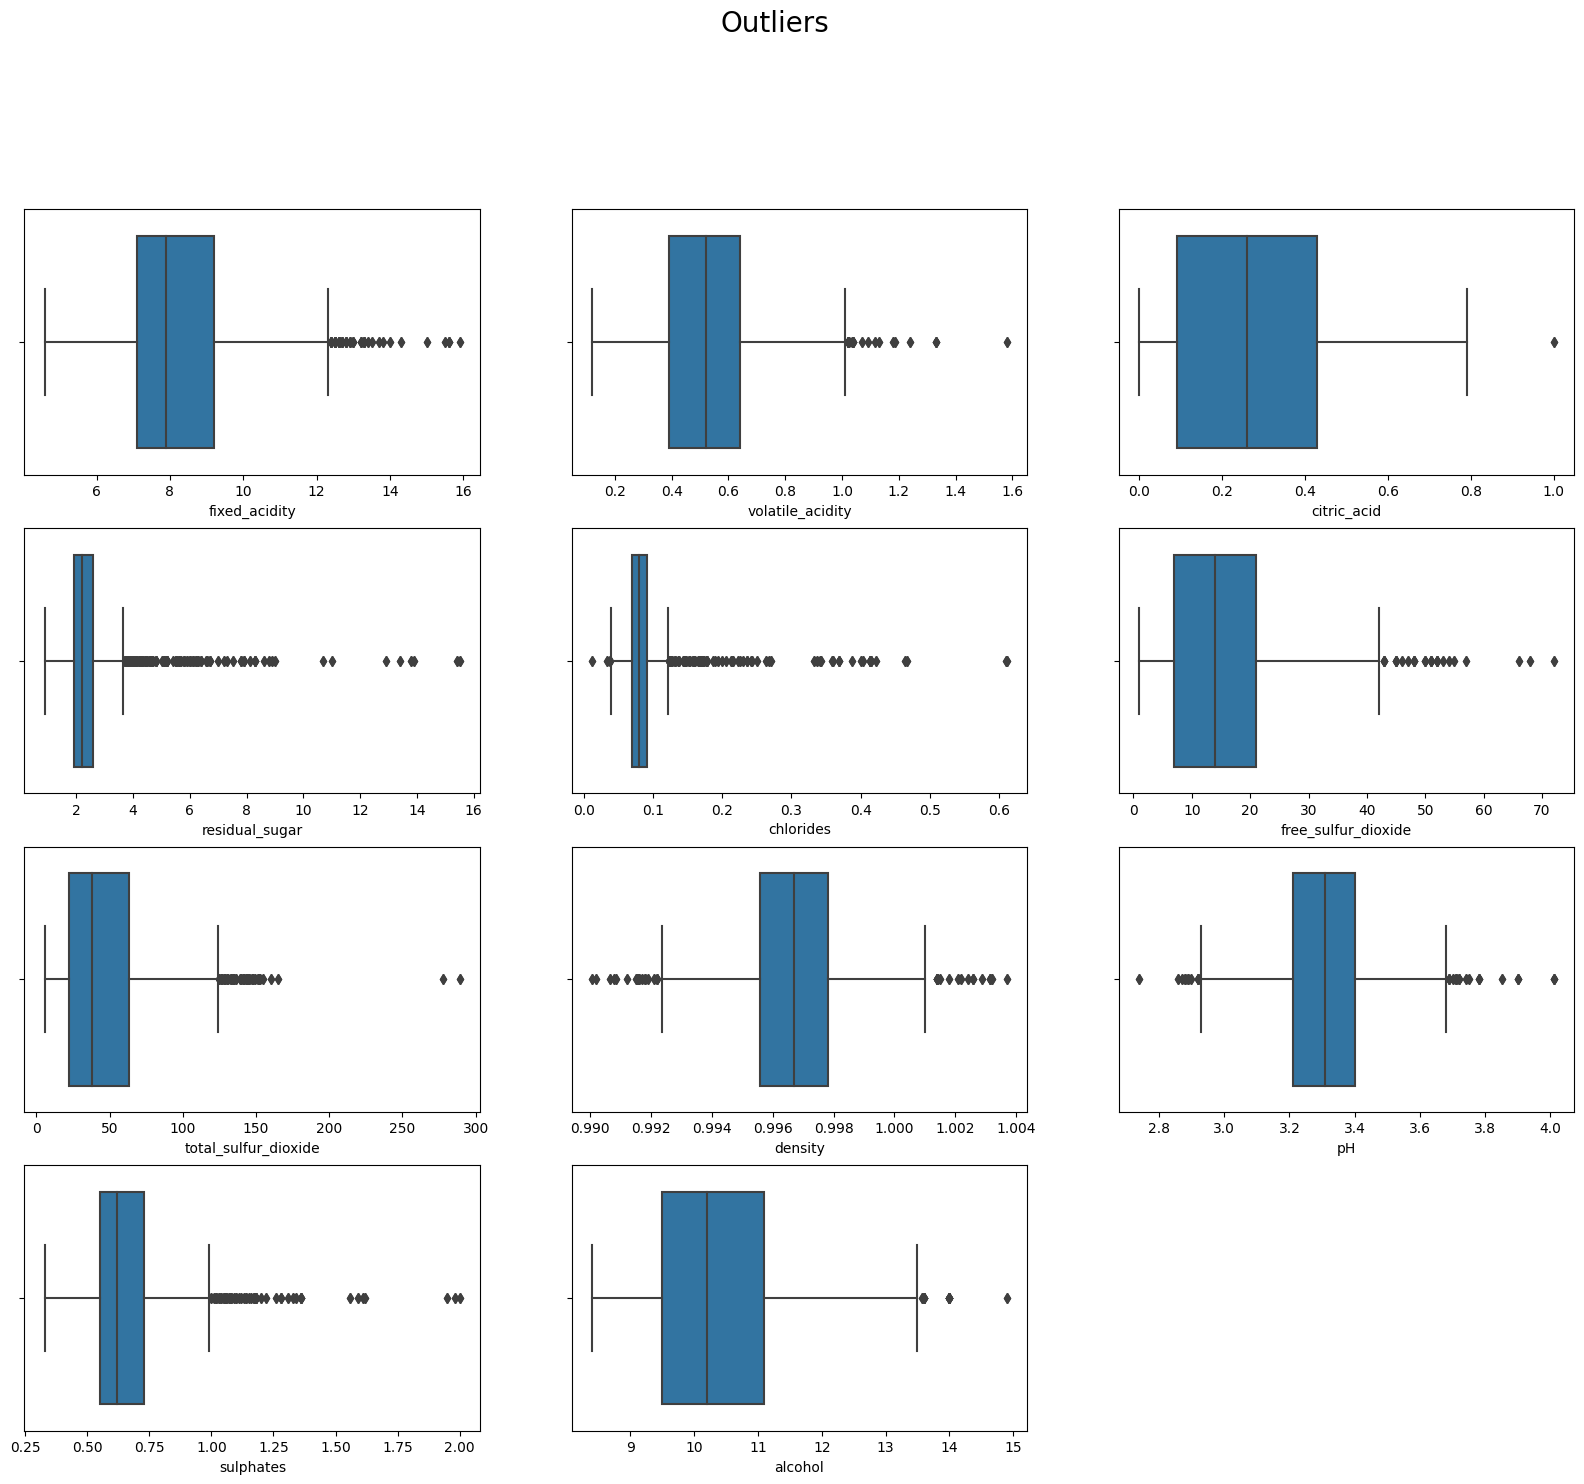

In [38]:
plt.figure(figsize=(20,20))
plt.suptitle('Outliers',fontsize=20)
numeric_column =  data.select_dtypes('int','float').columns
obj = data.select_dtypes('object').columns
col = data.columns
c=1
for i in range(len(col)):
  if col[i] not in obj:
    plt.subplot(5,3,c)
    sns.boxplot(x = data[col[i]])
    c+=1

In [39]:
data = data[data.fixed_acidity < 11.7]
data = data[(data.residual_sugar < 3.2) & (data.residual_sugar > 1.1)]
data = data[data.chlorides > 0.045]
data = data[data.free_sulfur_dioxide < 40]
data = data[data.total_sulfur_dioxide < 95]
data = data[(data.density > 0.9927) & (data.density < 1.0004)]
data = data[(data.pH  > 3.04) & (data.pH < 3.64)]
data = data[data.sulphates < 0.92]
data = data[data.alcohol < 13.45]

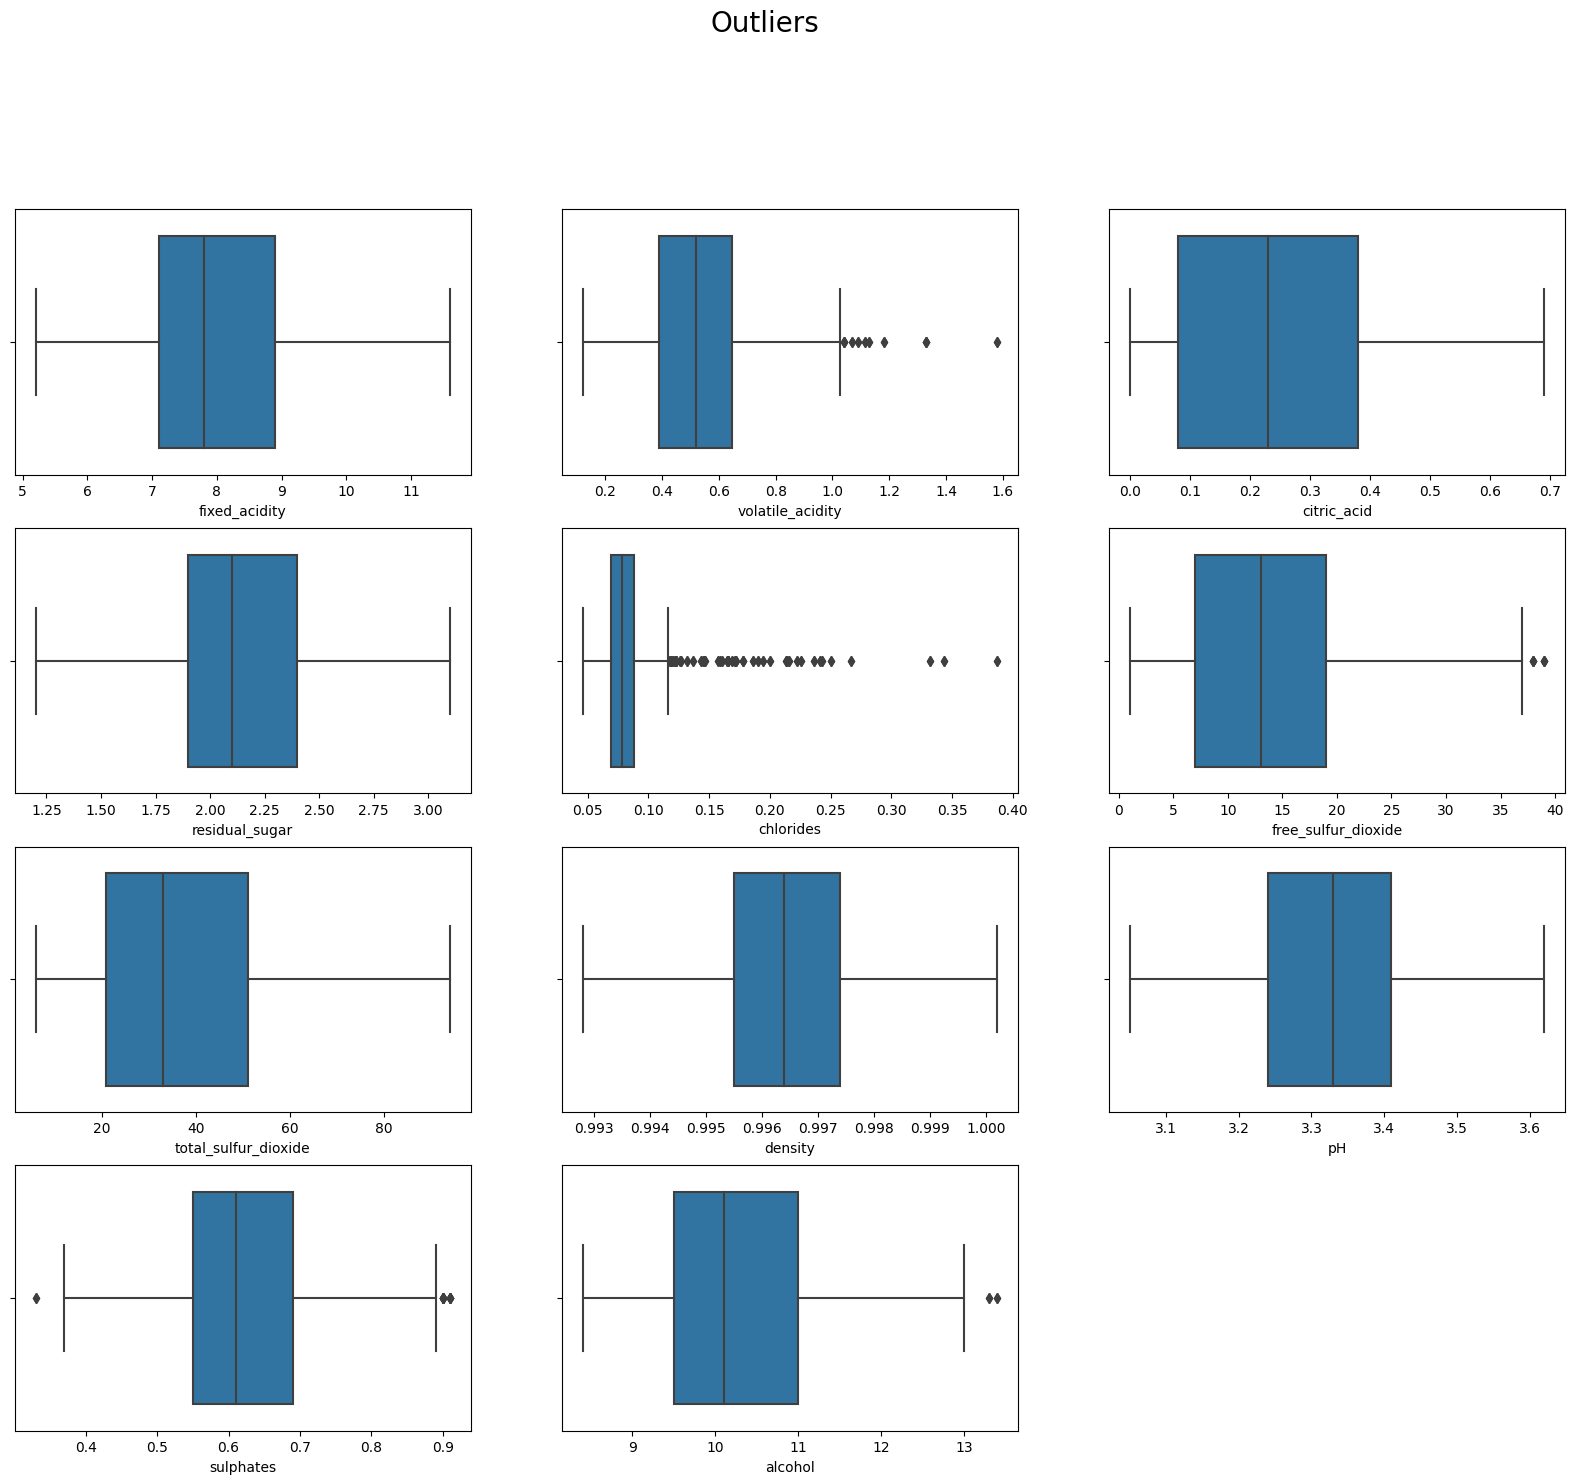

In [40]:
plt.figure(figsize=(20,20))
plt.suptitle('Outliers',fontsize=20)
numeric_column =  data.select_dtypes('int','float').columns
obj = data.select_dtypes('object').columns
col = data.columns
c=1
for i in range(len(col)):
  if col[i] not in obj:
    plt.subplot(5,3,c)
    sns.boxplot(x = data[col[i]])
    c+=1

In [41]:
data = data[data.fixed_acidity<12]
data = data[data.volatile_acidity < 0.8]
data = data[data.volatile_acidity < 1]
data = data[data.citric_acid < 0.8]
data = data[data.residual_sugar < 10]
data = data[data.chlorides < 0.1]
data = data[data.free_sulfur_dioxide < 80]
data = data[data.total_sulfur_dioxide < 320]
data = data[data.density < 1.01]
data = data[data.sulphates < 1.25]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

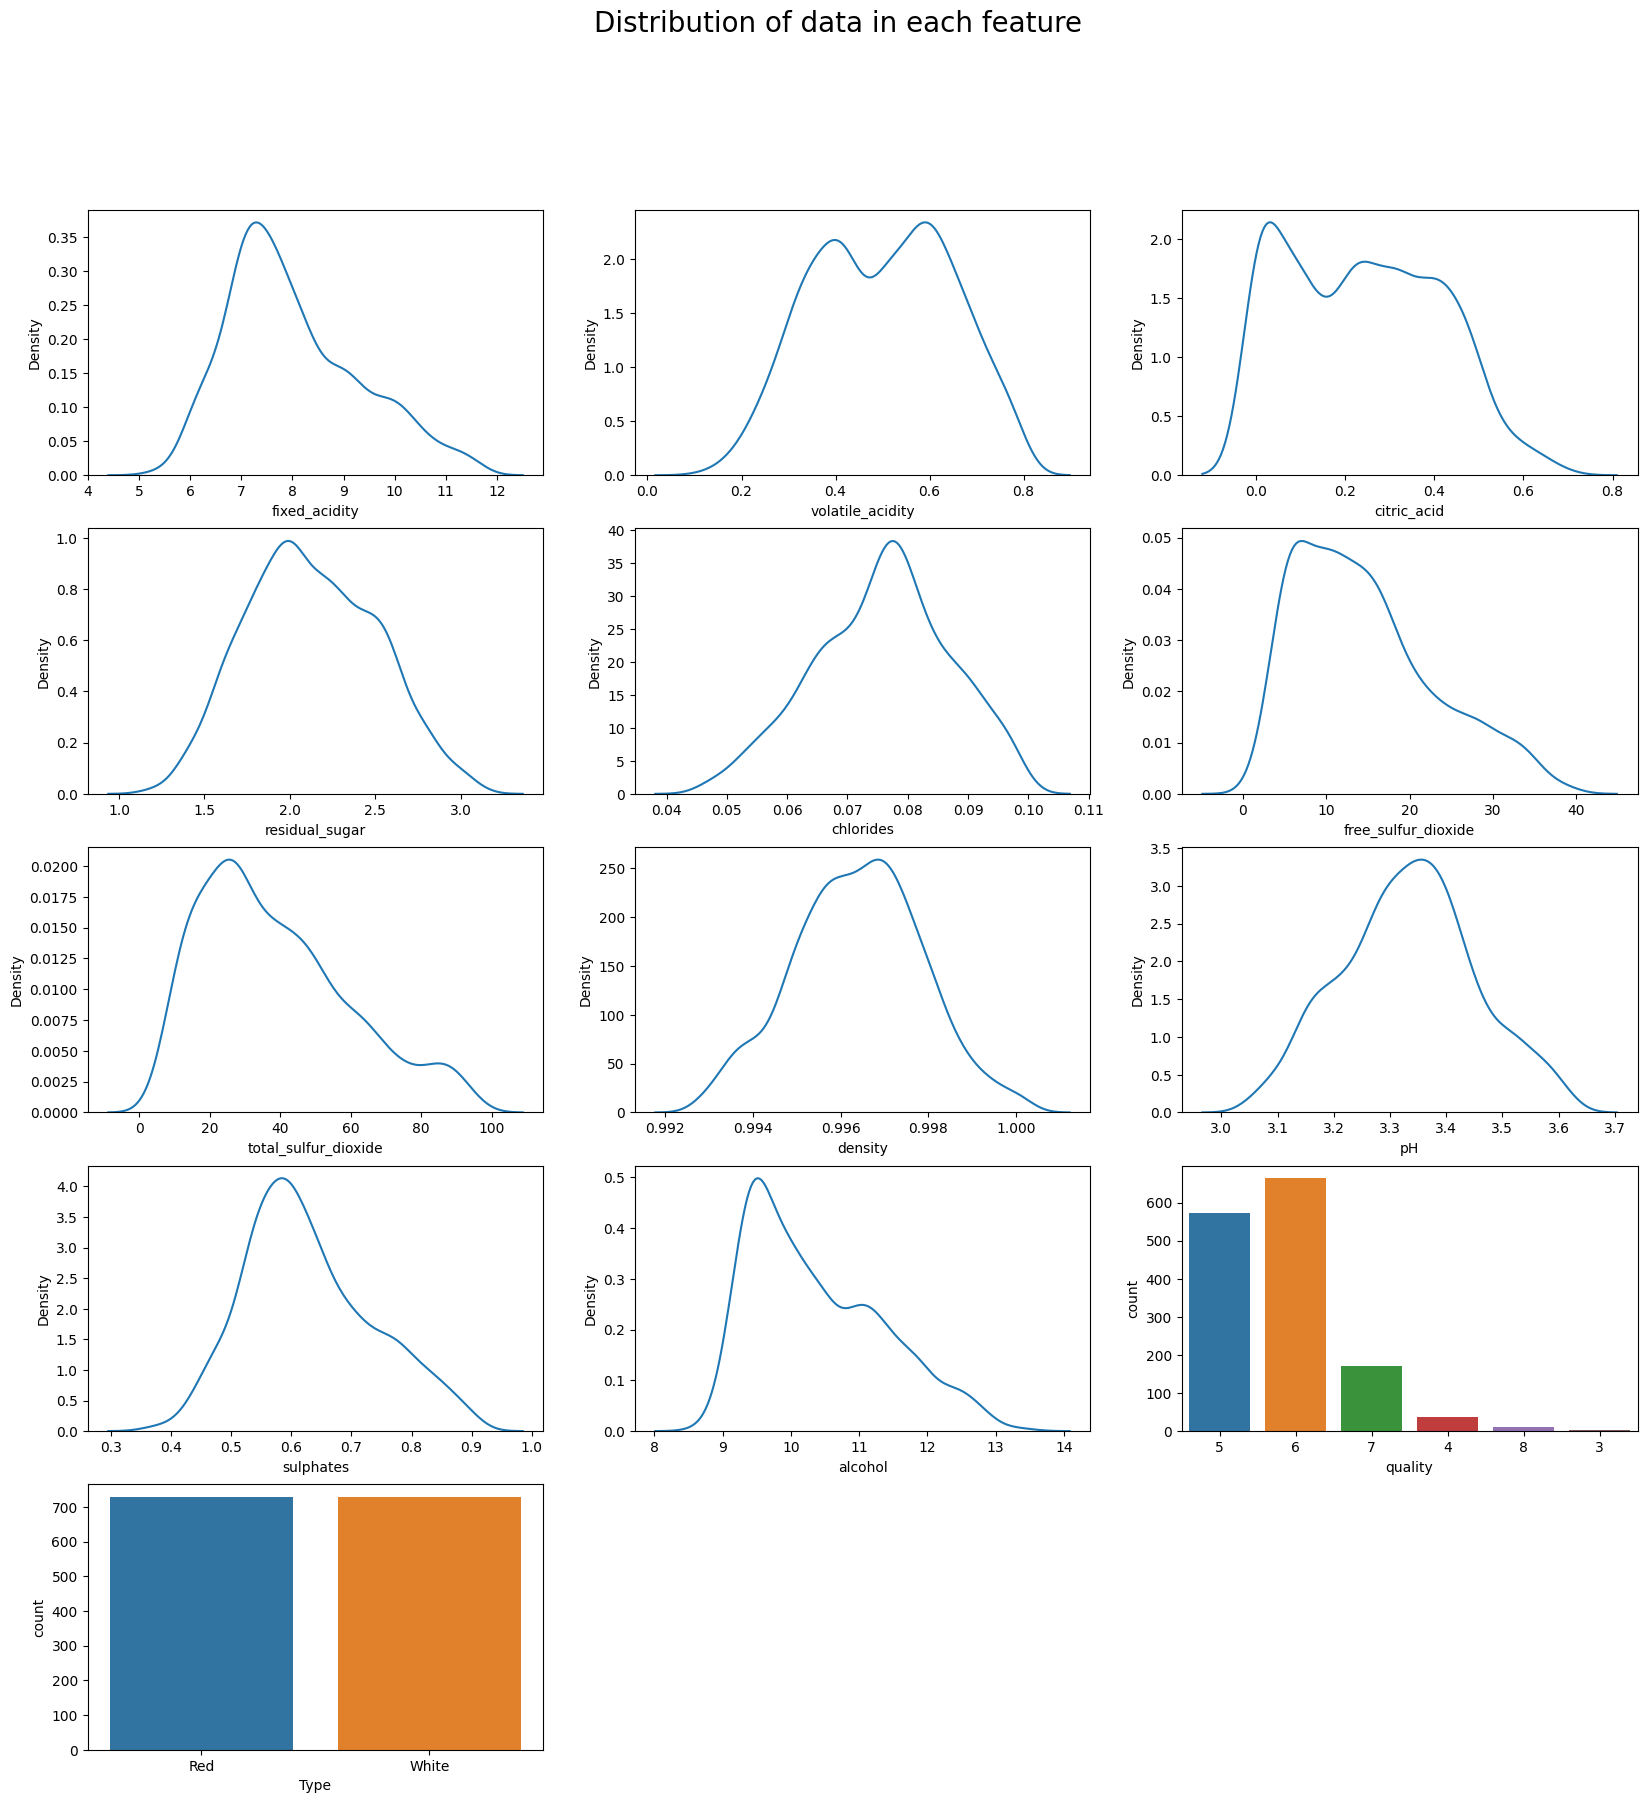

In [42]:
plt.figure(figsize=(20,20))
plt.suptitle('Distribution of data in each feature',fontsize=20)
numeric_column =  data.select_dtypes('int','float').columns
obj = data.select_dtypes('object').columns
col = data.columns
for i in range(len(col)):
  if col[i] in obj:
    plt.subplot(5,3,i+1)
    sns.countplot(x = data[col[i]])

  else:
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = data[col[i]])

In [43]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   

   alcohol quality Type  
0      9.4       5  Red  
2      9.8       5  Red  
3      9.8       6  Red  
5      9.4       5  Red  
6      9.4       5  Red

<Axes: >

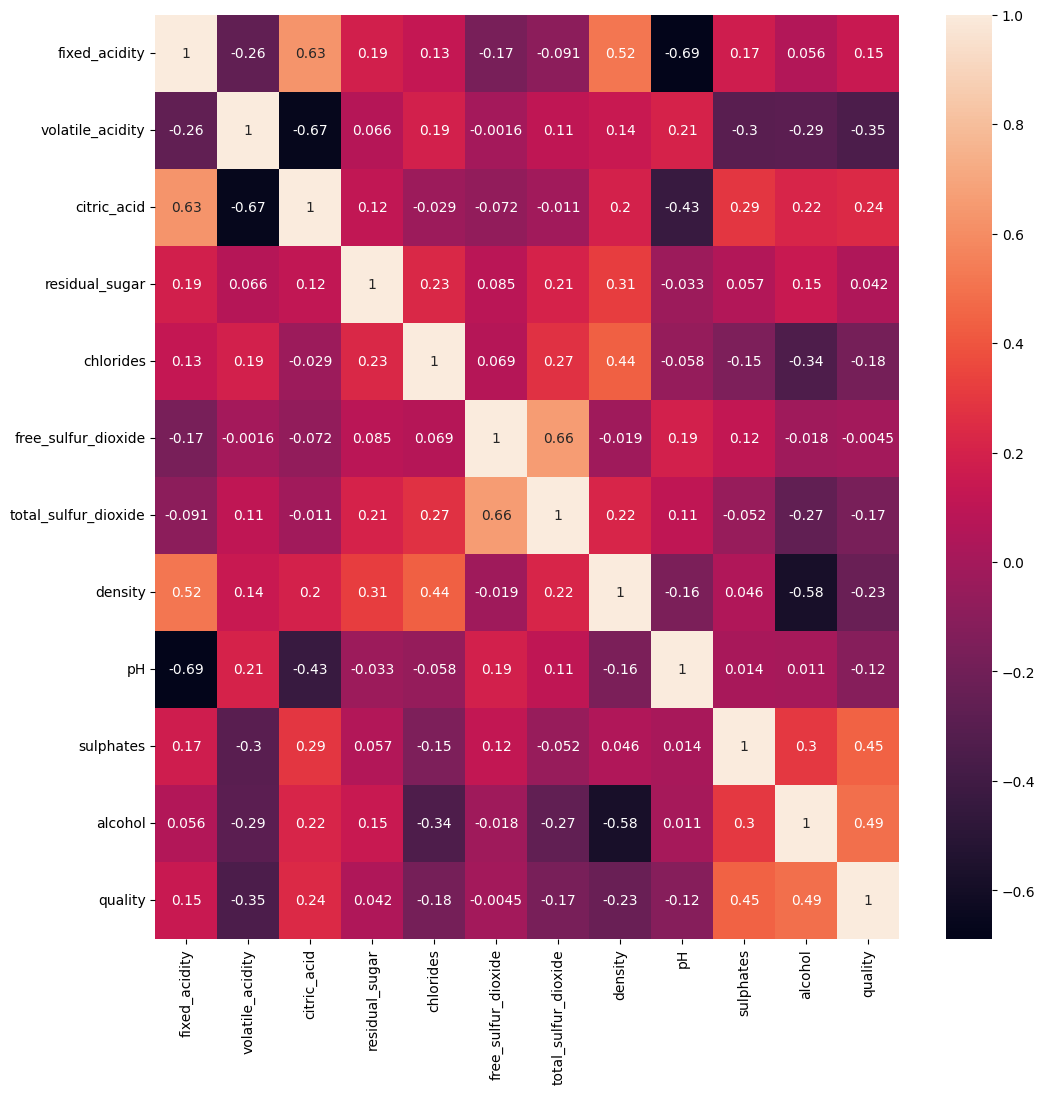

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(data.drop(columns=['Type']).corr(),annot=True)

In [45]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [46]:
Encoder = LabelEncoder()
data.Type = Encoder.fit_transform(data.Type)

In [47]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   

   alcohol quality  Type  
0      9.4       5     0  
2      9.8       5     0  
3      9.8       6     0  
5      9.4       5     0  
6      9.4       5     0

In [48]:
min_corr_col = ['free_sulfur_dioxide','residual_sugar','pH','fixed_acidity']
X = data.drop(columns=['quality']).values
y = data.quality.values


In [49]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print(np.std(X))
print(np.std(X_std))

12.518465111803545
1.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [51]:
Model = DecisionTreeClassifier(max_depth=17)

In [52]:
Model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=17)

In [53]:
y_pred = Model.predict(X_test)

In [54]:
acc = accuracy_score(y_pred,y_test)
print(f'Accuracy Score is : {acc}')

Accuracy Score is : 0.9013698630136986
